## Binary Classification - Iris Dataset

We will perform binary classification using K Nearest Neighbor (K-NN) model.

### Dataset
We will use the iris dataset. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

The target (label) is coded as follows:
- Setosa: 0
- Versicolor: 1
- Virginica: 2

We will build a K-NN classifier to detect the Iris-Virginica (2) type.


## Goals
- Learn to use suitable performance measures
- Learn to do cross-validation
- Learn to do model selection via hyperparameter tuning



## Load Data

First load the data and explore the feature names, target names, etc.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

# See the key values
print(list(iris.keys()))

# The feature names
print(list(iris.feature_names))

# The target names
print(list(iris.target_names))

# The target values (codes)
print(list(iris.target))

['feature_names', 'target_names', 'data', 'DESCR', 'target']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Create the Data Matrix and the Target Vector

We create the binary target vector by putting 1 if the target value is 2 (Iris-Virginica), else we put 0.

In [3]:
import numpy as np


# Data Matrix
X = iris["data"]


# Target Vector
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Create Train and Test Dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


## Create the K-NN Model & Vary K

We will create the K-NN model and fit the training data on the model.

### Choose optimum K

We determine the optimum K by evaluating the K-NN model for various values of K. 

The K-NN model is evaluated by computing performance measure. There are various performamce measures for classification problems.

The sklearn KNeighborsClassifier uses, by default, "accuracy" as the performance measure. In a skewed dataset, accuracy doesn't provide a good estimate of the performance of the model. We will have to use confusion matrix, precision, recall, f1 score, etc.

But for now, let's use KNeighborsClassifier's default accuracy score function to evalute the model's performance for various values of K.


In [6]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,30)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

/Users/hasan/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


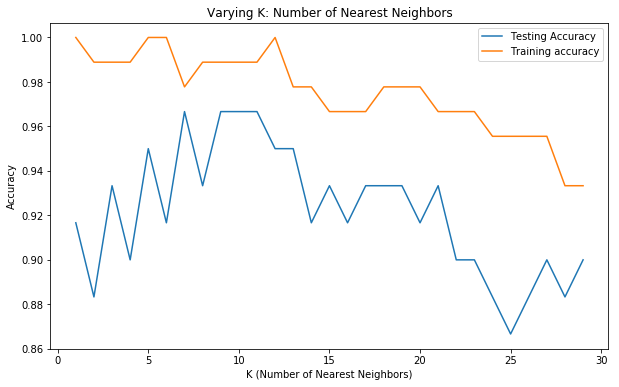

In [7]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Determine the Opimum K 

From the above diagram, find the the value of K that gives maximum accuracy on the test data.

## Model Selection: Hyperparameter Tunining


A K-NN model is defined by a set of parameters: nearest neighbors (K), distance metric (p), etc. These are called hyperparameters.

We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.

The best way to do hyperparameter tuning is to use cross-validation.

We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.

We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation. 


## Important:

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For multiclass classification, we may use "f1_micro" scoring function. The f1_micro function is the average of the F1 score of each class with weighting depending on the average parameter.

In the binary classification, f1 score function can be used. We may also use the precision, recall, roc_auc functions.

In [9]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=3)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metric

Best Score: 1.000000
Optimal Hyperparameter Values:  {'n_neighbors': 10, 'weights': 'uniform', 'p': 100}


/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/metric

## Select The Best Model 

Using the optimal hyperparameter values, create the best model.
Then, fit the model.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", algorithm='auto', n_neighbors=10, p=100)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=100,
           weights='uniform')

## Prediction

We can predict two type of values:
- Class (target) of the data using the predict() function
- Probabilities of belonging to all classes using the predict_proba() function

We will make these two type of predictions on two train data points.

Note that these two functions require a 2D array as argument.

To make prediction on a single data point, we need to "reshape" it as a 2D array.

## Binary Classification

For binary classification problems, the predict_proba() function will return a 2D array. 
- 1st column: represents the probability of belonging to class 0
- 2nd column: represents the probability of belonging to class 1


In [9]:

data1Index = 2
data2Index = 49

y_train_predicted_1 = knn.predict(X_train[data1Index].reshape(1, -1))
print("\nPredicted Class for the first data: %d" % y_train_predicted_1)

y_train_predicted_proba_1 = knn.predict_proba(X_train[data1Index].reshape(1, -1))
print("Predicted Class Probabilities for the first data: ", y_train_predicted_proba_1)


y_train_predicted_2 = knn.predict(X_train[data2Index].reshape(1, -1))
print("\nPredicted Class for the second data: %d" % y_train_predicted_2)

y_train_predicted_proba_2 = knn.predict_proba(X_train[data2Index].reshape(1, -1))
print("Predicted Class Probabilities for the second data: ", y_train_predicted_proba_2)



Predicted Class for the first data: 1
Predicted Class Probabilities for the first data:  [[0.3 0.7]]

Predicted Class for the second data: 0
Predicted Class Probabilities for the second data:  [[0.9 0.1]]


## Observation of the Predictictions

From the above output, observe that for the 1st data point, the predicted class is 1, because the 2nd column of its probability estimate matrix (for class 0 and class 1) is larger.

However, for the 2nd data point, the predicted class is 0, because the 1st column of its probability estimate matrix (for class 0 and class 1) is larger.



# What Happenns When Class Probabilities of a Data Point are Equal?

Consider the following two data points.

Their class probabilities are equal.

How are their target classes determined?

See the example below.

In [10]:
data3Index = 81
data4Index = 59


y_train_predicted_proba_3 = knn.predict_proba(X_train[data3Index].reshape(1, -1))
print("\nPredicted Class Probabilities for the first data: ", y_train_predicted_proba_3)

y_train_predicted_3 = knn.predict(X_train[data3Index].reshape(1, -1))
print("Predicted Class for the first data: %d" % y_train_predicted_3)


y_train_predicted_proba_4 = knn.predict_proba(X_train[data4Index].reshape(1, -1))
print("\nPredicted Class Probabilities for the second data: ", y_train_predicted_proba_4)

y_train_predicted_4 = knn.predict(X_train[data4Index].reshape(1, -1))
print("Predicted Class for the second data: %d" % y_train_predicted_4)


Predicted Class Probabilities for the first data:  [[0.5 0.5]]
Predicted Class for the first data: 0

Predicted Class Probabilities for the second data:  [[0.5 0.5]]
Predicted Class for the second data: 0


## Evaluate Model Performance 

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).

In [11]:
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


## Evalute The Model Using Confusion Matrix


We use the cross_val_predict() function to performs cross-validation, 

However, unlike cross_val_score, it doesn't return the evaluation scores.

Instead it returns the predictions made on each test fold. 

This means that we get a clean prediction for each instance in the training set.

By “clean” we mean that the prediction is made by a model that never saw the data during training).

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[61,  0],
       [ 0, 29]])

# Precision, Recall & F1 Score

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 1.000000
Recall = 1.000000
F1 Score = 1.000000


## Evaluate the Model using the ROC Curve for Train Data

The Receiver Operating Characteris (ROC) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

We will use sklearn.metrics.roc_curve() function to generate the ROC curve.

It will take at least two arguments:
- True binary labels
- Target scores

Note that the target scores can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).



### Target Score for K-NN

For K-NN classifier, we use the probability estimates of the positive class as the target score.

There are two ways to obtain the probability estimates of the positive class.
- The knn model's predict_proba() function.
- The model_selection.cross_val_predict() function in which need to use the attribute "method" with the value "predict_proba" as: method="predict_proba"

Note that both of the functions will return a n X 2 matrix (n = no. of data). The second column of this matrix stores the probability of the positive classes.

Thus, we need to retrieve the values from the 2nd column of the returned matrix to get the probability estimates of the positive class (target score values).



In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.         0.         0.         0.         0.04918033
 0.08196721 0.14754098 0.26229508 1.        ]
TPR:  [0.62068966 0.75862069 0.79310345 0.93103448 1.         1.
 1.         1.         1.         1.        ]

Thresholds:  [1.  0.9 0.8 0.7 0.6 0.5 0.3 0.2 0.1 0. ]


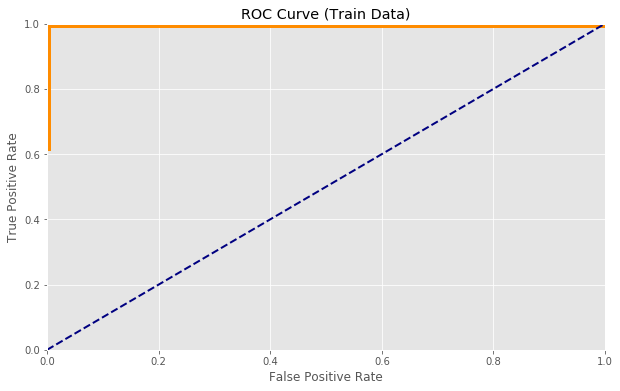

In [15]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## Area Under the ROC Curve

In [16]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

1.0

# Precision-Recall Curve

We can plot precision and recall as functions of the threshold values.

Then, we can select the threshold value that gives the best precision/recall tradeoff for our problem. 

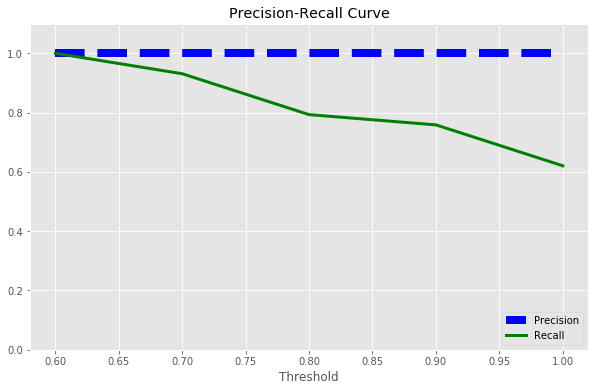

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()



# Observation from Precision-Recall Tradeoff Curve

From the above graph, we observe that the recall starts decreasing from 0.6 threshold.


# Performance Measures for Varying Threshold

We have computed the performance measures (precision, recall, F1 score, & confusion matrix) based on the default threshold 0.5.

It is possible to improve performance of a classifier (precision and/or recall) by setting its threshold to a new value.

For the binary classification of the Iris dataset we already achieved the optimal precision and recall. Thus, there is no need to make precision-recall tradeoff.

But it's important to know how to do this.

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Performance Measures Based on the Default Threshold:\n")

# Precision, Recall, F1 Score and Confusion Matrix for the Default Threshold 0.5
precision_train = precision_score(y_train, y_train_pred) 
print("Precision (Default Threshold 0.5) = %f" % precision_train)

recall_train = recall_score(y_train, y_train_pred)
print("Recall (Default Threshold 0.5) = %f" % recall_train)


f1_train = f1_score(y_train, y_train_pred)
print("F1 Score (Default Threshold 0.5) = %f" % f1_train)

print("Confusion Matrix (Default Threshold 0.5)\n", confusion_matrix(y_train, y_train_pred))


print("\n-------------------------------------------------------\n")
print("Performance Measures Based on New Threshold:")

# Precision, Recall, F1 Score and Confusion Matrix for different threshold

t = 0.4 # threshold 

# Compute predictions based on new t by using the following method:
#  - Get the probability of the positive class from the 2nd column [:, 1]
#  - If that probability is greater than or equal to t, then the test data belongs to the positive class
y_train_predicted_new = (knn.predict_proba(X_train)[:,1] >= t).astype(int)


precision = precision_score(y_train, y_train_predicted_new) 
print("\nPrecision (Threshold %.2f) = %f" % (t, precision))

recall = recall_score(y_train, y_train_predicted_new)
print("Recall (Threshold %.2f) = %f" % (t, recall))


f1 = f1_score(y_train, y_train_predicted_new)
print("F1 Score = (Threshold %.2f) = %f" % (t, f1))


print("Confusion Matrix (Threshold %.2f)" %  t) 
print(confusion_matrix(y_train, y_train_predicted_new))


Performance Measures Based on the Default Threshold:

Precision (Default Threshold 0.5) = 1.000000
Recall (Default Threshold 0.5) = 1.000000
F1 Score (Default Threshold 0.5) = 1.000000
Confusion Matrix (Default Threshold 0.5)
 [[61  0]
 [ 0 29]]

-------------------------------------------------------

Performance Measures Based on New Threshold:

Precision (Threshold 0.40) = 0.906250
Recall (Threshold 0.40) = 1.000000
F1 Score = (Threshold 0.40) = 0.950820
Confusion Matrix (Threshold 0.40)
[[58  3]
 [ 0 29]]


## Observation from Varying Threshold

From the above results we observe that by setting a new threshold (t = 0.4), we can change the performance of the classifier.

For this example, setting threshold to a different value doesn't bring any benefit. But it is a useful technique for making optimal tradeoff between precision and recall.

# Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.

Often times the accuracy is not a good measure.

We also compute the other performance measures, such as the confusion matrix, precision, recall, and the F1 score for the test data.

## Confusion Matrix for Test Data

In [23]:
# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

Accuracy: 0.933333

No. of correct predictions (Test): 56/60

Confusion Matrix (Test Data):
 [[38  1]
 [ 3 18]]


## Precision, Recall & F1 Score for Test Data

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)


Precision = 0.947368
Recall = 0.857143
F1 Score = 0.900000


## ROC Curve for Test Data

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.         0.         0.05128205 0.05128205 0.12820513
 0.20512821 0.23076923 0.30769231 0.35897436 1.        ]
TPR:  [0.0952381  0.42857143 0.52380952 0.57142857 0.80952381 0.85714286
 0.95238095 1.         1.         1.         1.        ]

Thresholds:  [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


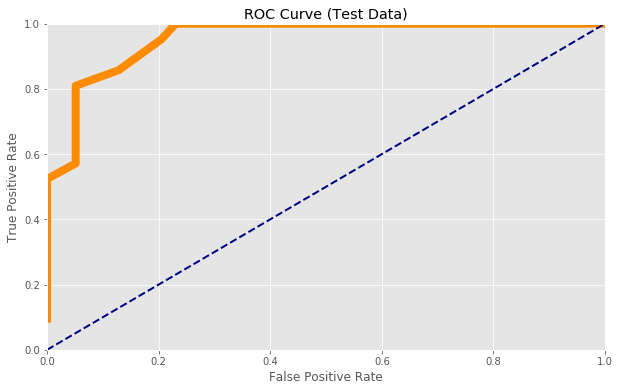

In [83]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr_test, tpr_test, label=None): 
    plt.plot(fpr_test, tpr_test, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Test Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_test, tpr_test)
plt.show()



## Area Under the ROC Curve (Test Data)

In [84]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_scores_test)

0.956043956043956

## Confusion Matrix

Using pandas crosstab, we create a better visualization of the confusion matrix.

In [85]:
import pandas as pd

pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,38,1,39
1,3,18,21
All,41,19,60


## Summary of Classification Metrics

We can build a text report showing the main classification metrics.

In [86]:
# import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_predicted))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95        39
          1       0.95      0.86      0.90        21

avg / total       0.93      0.93      0.93        60

